In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [11]:
def show_img(img, title='Image', cmap='gray'):
    plt.figure(figsize=(10, 6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [12]:
img1 = cv2.imread(cv2.samples.findFile('one.png'), cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(cv2.samples.findFile('two.png'), cv2.IMREAD_GRAYSCALE)


In [13]:
def harris_corners(img):
    gray = np.float32(img)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    dst = cv2.dilate(dst, None)
    img_harris = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    img_harris[dst > 0.01 * dst.max()] = [0, 0, 255]
    return img_harris

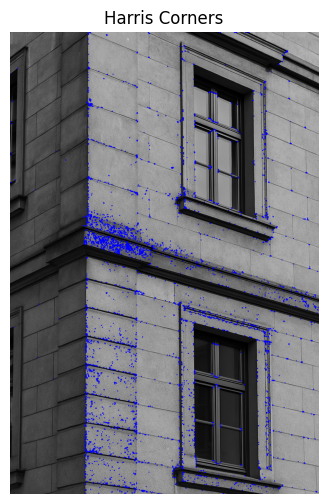

In [14]:
harris_result = harris_corners(img1)
show_img(harris_result, "Harris Corners")

In [17]:
def shi_tomasi_corners(img):
    corners = cv2.goodFeaturesToTrack(img, maxCorners=100, qualityLevel=0.01, minDistance=10)
    corners = np.intp(corners)
    img_shi = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for i in corners:
        x, y = i.ravel()
        cv2.circle(img_shi, (x, y), 4, (0, 255, 0), -1)
    return img_shi


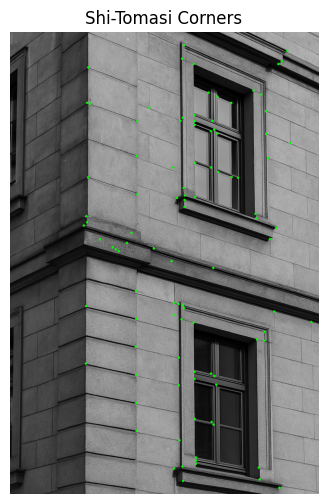

In [18]:
shi_result = shi_tomasi_corners(img1)
show_img(shi_result, "Shi-Tomasi Corners")

In [21]:
def sift_matching(img1, img2):
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)


    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)


    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    # Draw matches
    match_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)
    return match_img

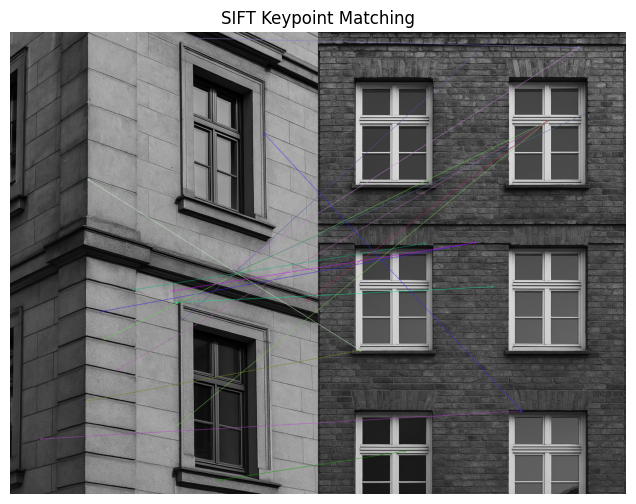

In [22]:
sift_result = sift_matching(img1, img2)
show_img(sift_result, "SIFT Keypoint Matching", cmap=None)